In [4]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [6]:
# Load dữ liệu
data = pd.read_csv('datasets/movie_metadata.csv')
print(f"Dataset shape: {data.shape}")
print(f"Dataset size: {data.size:,} cells")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Hiển thị 10 dòng đầu tiên
display(data.head(10))

# Hiển thị thông tin các cột
print("\nThông tin các cột:")
print(data.columns.tolist())


Dataset shape: (5043, 28)
Dataset size: 141,204 cells
Memory usage: 4.53 MB


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000



Thông tin các cột:
['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [7]:
def data_quality_report(df):
    """
    Tạo báo cáo chất lượng dữ liệu chi tiết
    Nguồn: Data Science Best Practices
    """
    print("=== DATA QUALITY REPORT ===")
    print(f"Dataset shape: {df.shape}")
    
    # Missing values analysis
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })
    missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
    
    print("\n=== MISSING VALUES ANALYSIS ===")
    display(missing_data[missing_data['Missing_Count'] > 0])
    
    # Duplicate analysis
    duplicates = df.duplicated().sum()
    print(f"\n=== DUPLICATE ANALYSIS ===")
    print(f"Total duplicates: {duplicates} ({(duplicates/len(df)*100):.2f}%)")
    
    # Data types analysis
    print("\n=== DATA TYPES DISTRIBUTION ===")
    print(df.dtypes.value_counts())
    
    return missing_data

missing_report = data_quality_report(data)


=== DATA QUALITY REPORT ===
Dataset shape: (5043, 28)

=== MISSING VALUES ANALYSIS ===


,Column,Missing_Count,Missing_Percentage,Data_Type
gross,gross,884,17.529248,float64
budget,budget,492,9.756098,float64
aspect_ratio,aspect_ratio,329,6.523895,float64
content_rating,content_rating,303,6.008328,object
plot_keywords,plot_keywords,153,3.033908,object
title_year,title_year,108,2.141582,float64
director_facebook_likes,director_facebook_likes,104,2.062265,float64
director_name,director_name,104,2.062265,object
num_critic_for_reviews,num_critic_for_reviews,50,0.991473,float64
actor_3_facebook_likes,actor_3_facebook_likes,23,0.456078,float64



=== DUPLICATE ANALYSIS ===
Total duplicates: 45 (0.89%)

=== DATA TYPES DISTRIBUTION ===
float64    13
object     12
int64       3
Name: count, dtype: int64


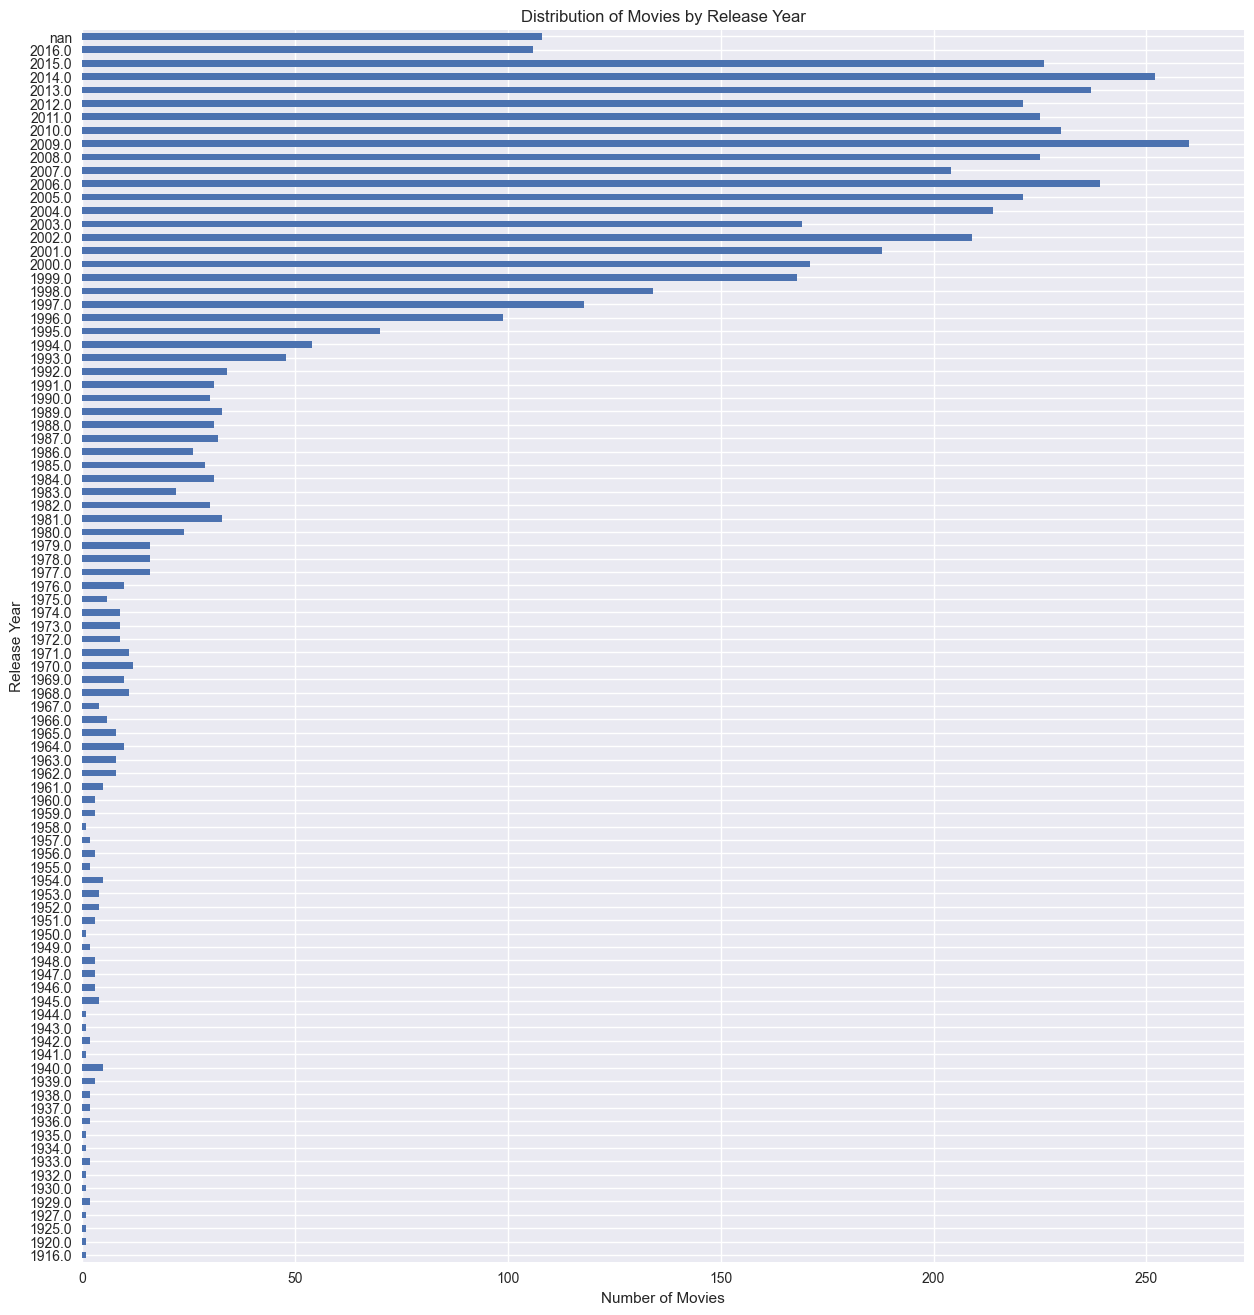

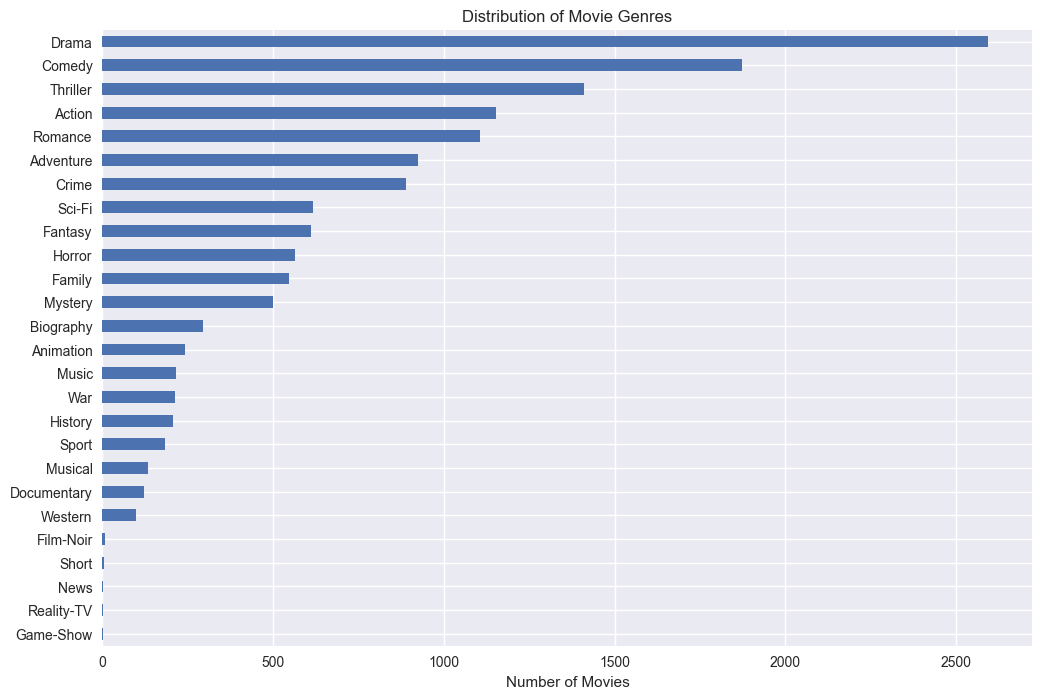

In [8]:
# Phân tích năm phát hành phim
plt.figure(figsize=(15,16))
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh')
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Number of Movies')
plt.ylabel('Release Year')
plt.show()

# Phân tích genres
plt.figure(figsize=(12,8))
genres_data = data['genres'].str.get_dummies(sep='|')
genres_counts = genres_data.sum().sort_values(ascending=True)
genres_counts.plot(kind='barh')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.show()


In [9]:
# Chọn các features cho recommendation system
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
print("Selected features:")
display(data.head())

# Xử lý missing values
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

# Xử lý genres
data['genres'] = data['genres'].str.replace('|', ' ')

# Chuẩn hóa movie title
data['movie_title'] = data['movie_title'].str.lower()
# Xóa null terminating char
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1] if isinstance(x, str) else x)


Selected features:


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [10]:
def validate_data(df):
    """
    Validate dữ liệu sau khi cleaning
    """
    print("=== DATA VALIDATION REPORT ===")
    
    # Check missing values
    missing = df.isnull().sum()
    print("\nMissing values after cleaning:")
    print(missing[missing > 0] if missing.any() else "No missing values")
    
    # Check data types
    print("\nData types:")
    print(df.dtypes)
    
    # Check unique values
    print("\nUnique values per column:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
    
    # Check text data quality
    print("\nText data quality check:")
    for col in ['movie_title', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']:
        empty_count = df[df[col].str.len() == 0].shape[0] if df[col].dtype == object else 0
        print(f"{col}:")
        print(f"  - Empty strings: {empty_count}")
        print(f"  - Sample values: {df[col].sample(3).tolist()}")
    
    return True

validate_data(data)


=== DATA VALIDATION REPORT ===

Missing values after cleaning:
No missing values

Data types:
director_name    object
actor_1_name     object
actor_2_name     object
actor_3_name     object
genres           object
movie_title      object
dtype: object

Unique values per column:
director_name: 2399 unique values
actor_1_name: 2098 unique values
actor_2_name: 3033 unique values
actor_3_name: 3522 unique values
genres: 914 unique values
movie_title: 4917 unique values

Text data quality check:
movie_title:
  - Empty strings: 0
  - Sample values: ['mars attacks!', 'home', 'the chronicles of narnia: prince caspian']
director_name:
  - Empty strings: 0
  - Sample values: ['Malcolm D. Lee', 'Chris Robinson', 'Phil Traill']
actor_1_name:
  - Empty strings: 0
  - Sample values: ['Jon Foo', 'Jason Flemyng', 'Amanda Schull']
actor_2_name:
  - Empty strings: 0
  - Sample values: ['Beau Bridges', 'Judy Greer', 'Lew Temple']
actor_3_name:
  - Empty strings: 0
  - Sample values: ['William Hurt', 'Dia

True

In [11]:
# Lưu dữ liệu đã xử lý
data.to_csv('data.csv', index=False)
print("Data saved successfully!")


Data saved successfully!
